In [4]:
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("./ASAP/bin")
import multiresolutionimageinterface as mir

In [7]:
# for test data
path0 = './Data/test'
plist = np.sort(glob.glob(path0+'/*.mrxs'))

# set mir parameters
annotation_list = mir.AnnotationList()
reader = mir.MultiResolutionImageReader()

for pn in plist:
    spn = pn.split('.mrxs')[0]
    mr_image = reader.open(pn)
    xml_repository = mir.XmlRepository(annotation_list)
    xml_repository.setSource(spn+('.xml'))
    xml_repository.load()
    annotation_mask = mir.AnnotationToMask()
    output_path = spn+('_label.mrxs')
    annotation_mask.convert(annotation_list, output_path, mr_image.getDimensions(), mr_image.getSpacing())
    break

Total time was 36511
Total reading time was 0
Total base writing time was 123
Total pyramid downsampling time was 0
Total pyramid writing time was 36388
Total time determining min/max was 17


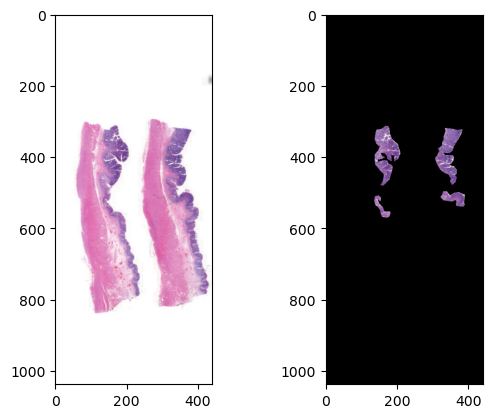

In [3]:
# show annotation sample
ts_path = './Data/test/image_001.mrxs'
tl_path = './Data/test/label_001.mrxs'

# set image level
level = 7

ts_image = reader.open(ts_path)
tl_image = reader.open(tl_path)
dts = ts_image.getLevelDownsample(level)
dtl = tl_image.getLevelDownsample(level)

ts_patch = ts_image.getUCharPatch(0, 0, 441, 1038, level)
tl_patch = tl_image.getUCharPatch(0, 0, 441, 1038, level)

plt.subplot(1, 2, 1)
plt.imshow(ts_patch)
plt.subplot(1,2,2)
ts_patch[tl_patch==0]=0
plt.imshow(ts_patch)
plt.show()

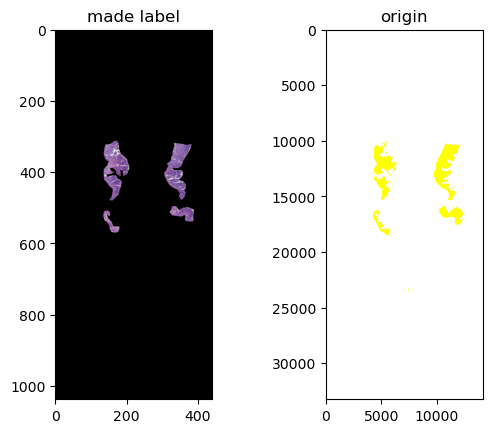

In [98]:
# Compare to existing labels
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
tiff_label = Image.open("./Data/test/image_001.tiff")
tiff_img = np.array(tiff_label)
tiff_img[tiff_img==0]=255

plt.subplot(1, 2, 1)
plt.title('made label')
plt.imshow(ts_patch)
plt.subplot(1,2,2)
plt.title('origin')
plt.imshow(tiff_img)
plt.show()